In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters (you can change these)
r_i = 1.0  # inner radius (undeformed)
r_o = 2.0  # outer radius (undeformed)
p = 1.0   # internal pressure
mu = 0.7692307692307692  # shear modulus

# Function to compute radial stress at a given R
def sigma_r(R, c):
    numerator = np.log((R**2 + c) / (r_o**2 + c))
    denominator = np.log((r_i**2 + c) / (r_o**2 + c))
    return -p * numerator / denominator

# Equation: sigma_r(r_i) = -p (should already hold), sigma_r(r_o) = 0
# We use sigma_r(r_o) = 0 to solve for c numerically
def equilibrium_condition(c):
    return sigma_r(r_o, c)  # should equal 0

# Initial guess for c
c_guess = 0.1

# Solve numerically
c_solution = fsolve(equilibrium_condition, c_guess)[0]
print(f"Solved c = {c_solution:.6f}")

# Generate R values from inner to outer radius
R_vals = np.linspace(r_i, r_o, 300)
r_vals = np.sqrt(R_vals**2 + c_solution)
u_vals = r_vals - R_vals

# Radial and hoop stress
lambda_r = R_vals / r_vals
lambda_theta = r_vals / R_vals
sigma_r_vals = sigma_r(R_vals, c_solution)
sigma_theta_vals = sigma_r_vals + mu * (lambda_theta**2 - lambda_r**2)


Solved c = 0.100000


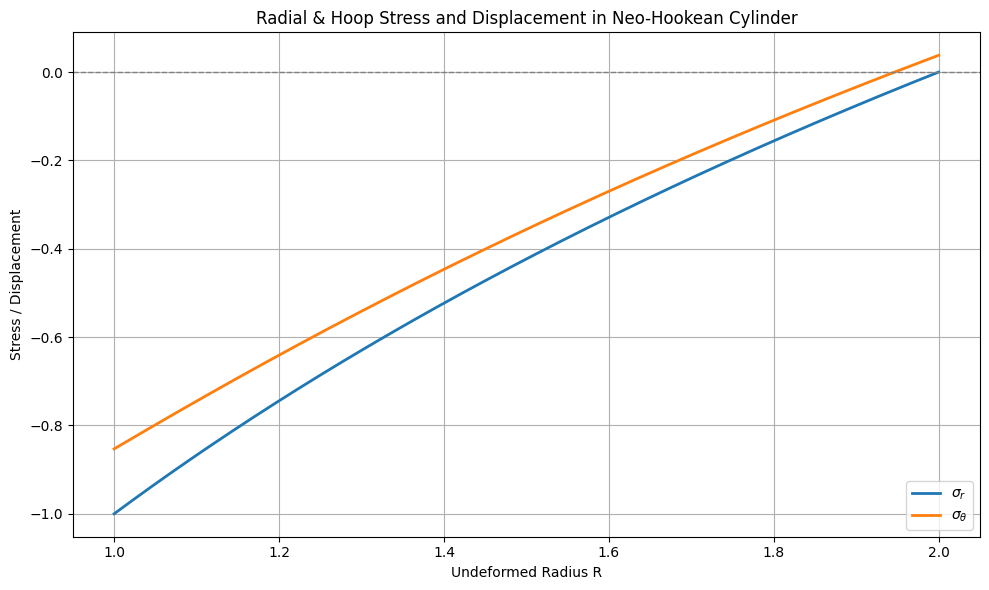

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(R_vals, sigma_r_vals, label=r'$\sigma_r$', linewidth=2)
plt.plot(R_vals, sigma_theta_vals, label=r'$\sigma_\theta$', linewidth=2)
# plt.plot(R_vals, u_vals, label=r'$u(R)$ (displacement)', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Undeformed Radius R")
plt.ylabel("Stress / Displacement")
plt.title("Radial & Hoop Stress and Displacement in Neo-Hookean Cylinder")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()